In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV,KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('diamonds.csv')
df.shape

(53940, 11)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df =df.drop(df[df["x"]==0].index)
df =df.drop(df[df["y"]==0].index)
df =df.drop(df[df["z"]==0].index)
df.shape


(53920, 11)

In [8]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Summary' column
df['cut'] = label_encoder.fit_transform(df['cut'])

df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])


df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df["size"] = df["x"] * df["y"] * df["z"]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


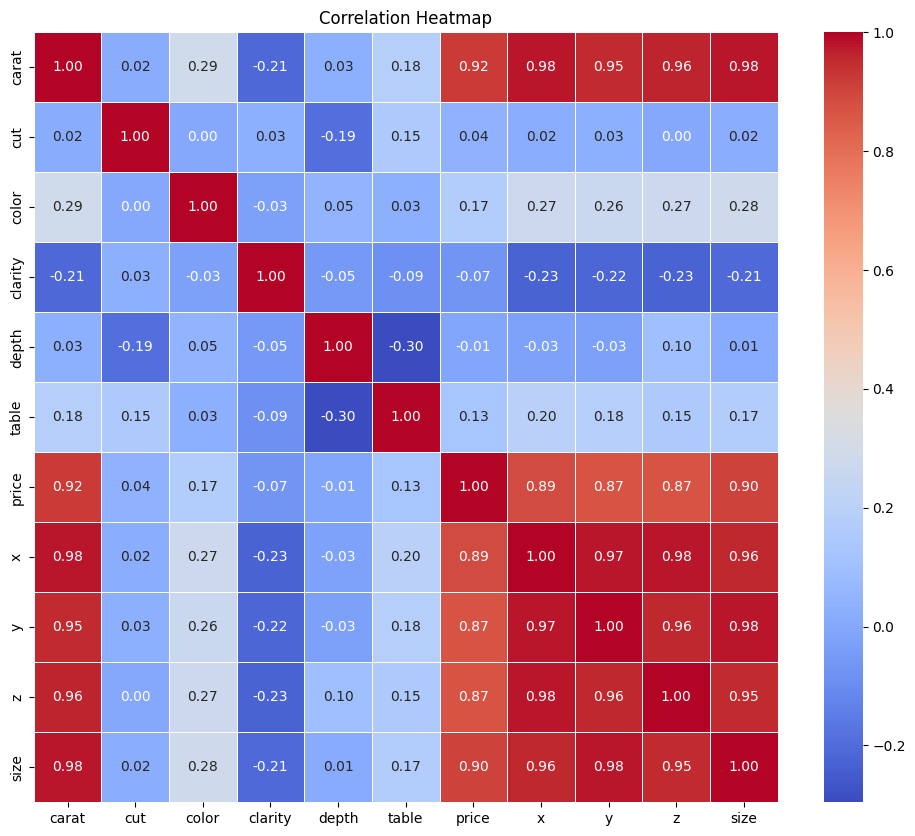

In [10]:
numeric_df = df.drop(columns=['Unnamed: 0'])
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# drop highly correlated features
numeric_df = numeric_df.drop(['carat', 'x' ,'y','z'] ,axis=1)

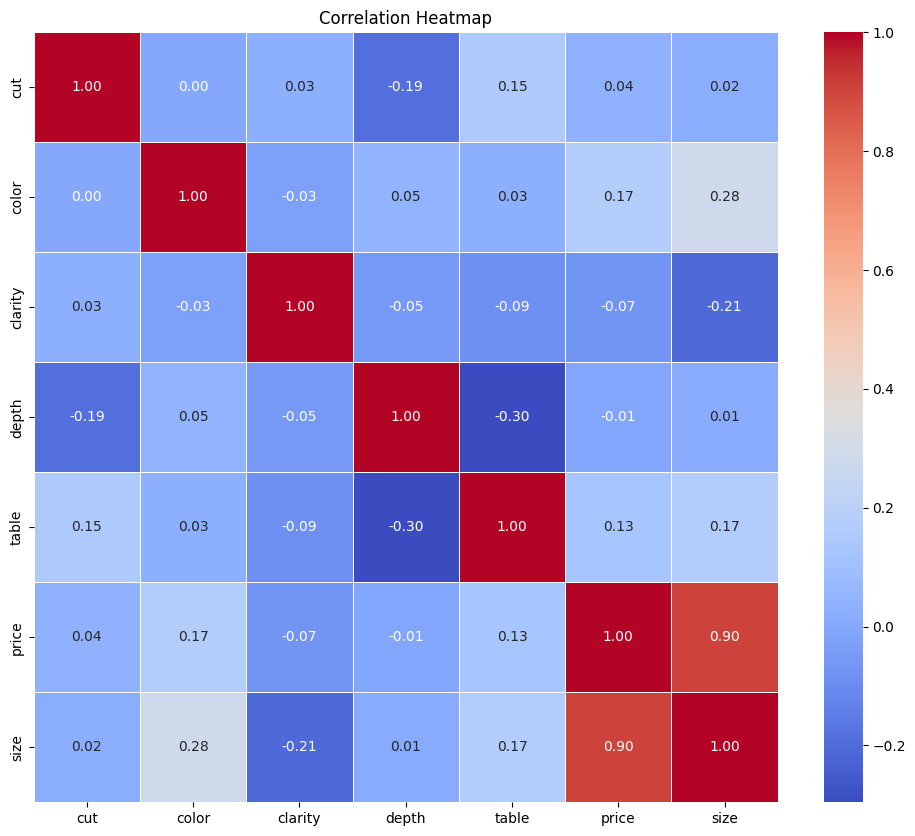

In [12]:
correlation_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)

In [14]:
scaled_df

,cut,color,clarity,depth,table,price,size
0,-0.538173,-0.936971,-0.484445,-0.174203,-1.099725,-0.904132,-1.172291
1,0.434877,-0.936971,-1.064312,-1.361090,1.585988,-0.904132,-1.219546
2,-1.511224,-0.936971,0.095422,-3.385781,3.376463,-0.903881,-1.173891
3,0.434877,1.414232,0.675289,0.454149,0.243131,-0.902125,-1.063334
4,-1.511224,2.002033,-0.484445,1.082501,0.243131,-0.901875,-0.996948
...,...,...,...,...,...,...,...
53915,-0.538173,-1.524772,-1.064312,-0.662921,-0.204488,-0.294437,-0.178698
53916,-1.511224,-1.524772,-1.064312,0.942868,-1.099725,-0.294437,-0.150697
53917,1.407928,-1.524772,-1.064312,0.733417,1.138369,-0.294437,-0.197495
53918,0.434877,0.826431,-0.484445,-0.523288,0.243131,-0.294437,0.138950


In [15]:
# Select features including the target variable
#selected_features = ['x','y','z','carat','table','color','size' ]
X= scaled_df.drop('price' ,axis=1)
#X= scaled_df.drop(['carat','price' , 'x' ,'y','z'] ,axis=1)
y = scaled_df['price']

In [16]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize K-Fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train,y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]


In [18]:
X_train_fold.shape

(34509, 6)

In [19]:
X_test_fold.shape

(8627, 6)

In [20]:
y_train_fold.shape

(34509,)

In [21]:
y_test_fold.shape

(8627,)

In [22]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_fold)
#X_test_scaled = scaler.transform(X_test_fold)

In [23]:
# Train the SVM regression model
svm_regressor = SVR(C=10,kernel='rbf',gamma='scale') 
svm_regressor.fit(X_train_fold, y_train_fold )


y_pred = svm_regressor.predict(X_test_fold)


In [24]:

# Evaluate the model
train_r2 = svm_regressor.score(X_train_fold, y_train_fold)
test_r2 = r2_score(y_test_fold, y_pred)
mae = mean_absolute_error(y_test_fold, y_pred)
mse = mean_squared_error(y_test_fold, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
r2 = r2_score(y_test_fold, y_pred)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Training accuracy:", train_r2)
print("Test accuracy:", test_r2)


Mean Absolute Error: 0.11067256867197495
Mean Squared Error: 0.04255431906748594
Root Mean Squared Error: 0.20628698230253392
Training accuracy: 0.9627855366935698
Test accuracy: 0.9577351451527133


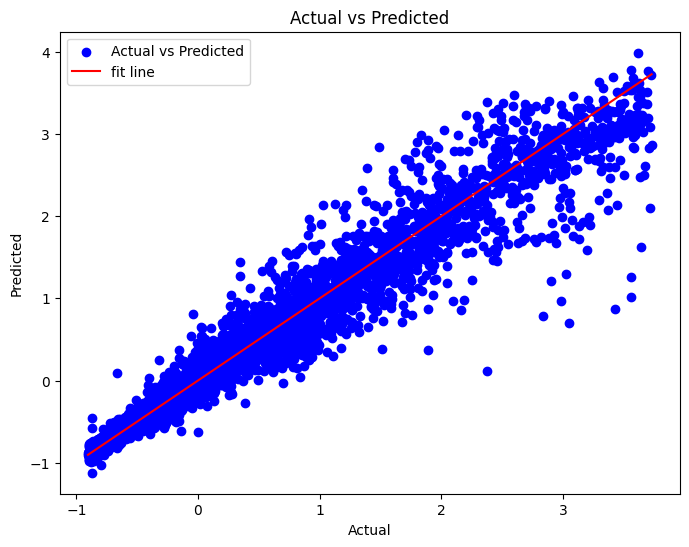

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_fold, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test_fold.min(), y_test_fold.max()], [y_test_fold.min(), y_test_fold.max()], color='red', label='fit line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()